In [1]:
#!pip install imblearn
#!pip install eli5
#!pip install ast
#!pip install collections
#!pip install simplefilter

In [2]:
import numpy as np
import re
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from __future__ import unicode_literals
from collections import Counter
from math import *
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, roc_auc_score
from xgboost import XGBRegressor,XGBClassifier
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVR
#import eli5
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestCentroid
from sklearn.metrics import classification_report, f1_score,accuracy_score ,confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import IsolationForest
import matplotlib.gridspec as gridspec
from sklearn.impute import KNNImputer
import seaborn as sns
import warnings
from warnings import simplefilter
import ast
simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [3]:
train_df = pd.read_csv("data/train.csv")
train_df.replace("NaN",np.nan,regex=True,inplace=True)
test_df = pd.read_csv("data/test.csv")
test_df.replace("NaN",np.nan,regex=True,inplace=True)

In [4]:
train_df.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
39454,0x6ba5,MYSRES03DEL03,20,4.9,12.299524,76.642620,12.389524,76.732620,27-03-2022,18:40:00,18:55:00,conditions Sunny,Medium,2,Buffet,motorcycle,0,No,Urban,(min) 13
43324,0xd206,AGRRES06DEL03,23,4.9,0.000000,0.000000,0.090000,0.090000,18-02-2022,18:20:00,18:30:00,conditions Cloudy,Medium,2,Snack,electric_scooter,0,No,Metropolitian,(min) 26
40033,0x6db4,PUNERES09DEL03,21,4.7,18.536562,73.896485,18.626562,73.986485,08-03-2022,18:35:00,18:50:00,conditions Sandstorms,Medium,0,Snack,motorcycle,1,No,Metropolitian,(min) 20
42639,0x631e,HYDRES18DEL02,30,4.8,17.450851,78.379347,17.470851,78.399347,05-03-2022,08:15:00,08:25:00,conditions Stormy,Low,1,Snack,motorcycle,0,No,Metropolitian,(min) 23
12478,0x54cc,CHENRES12DEL01,20,4.9,12.972793,80.249982,13.082793,80.359982,02-03-2022,18:55:00,19:05:00,conditions Windy,Medium,1,Buffet,scooter,1,No,NaN,(min) 22


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          43739 non-null  object 
 3   Delivery_person_Ratings      43685 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  43862 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            44977 non-null  object 
 12  Road_traffic_density         44992 non-null  object 
 13  Vehicle_conditio

In [6]:
train_df.isna().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weatherconditions               616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken(min)                   0
dtype: int64

In [7]:
train_df["Delivery_person_Age"] = train_df["Delivery_person_Age"].astype("float32")
train_df["Delivery_person_Ratings"] = train_df["Delivery_person_Ratings"].astype("float32")
test_df["Delivery_person_Age"] = test_df["Delivery_person_Age"].astype("float32")
test_df["Delivery_person_Ratings"] = test_df["Delivery_person_Ratings"].astype("float32")

In [8]:
train_df["ID"].nunique()

45593

In [9]:
train_df["Delivery_person_ID"].nunique()

1320

In [10]:
train_df["Delivery_person_Age"].unique()

array([37., 34., 23., 38., 32., 22., 33., 35., 36., 21., 24., 29., 25.,
       31., 27., 26., 20., nan, 28., 39., 30., 15., 50.], dtype=float32)

In [11]:
train_df["Delivery_person_Age"].fillna(int(train_df["Delivery_person_Age"].mean()),inplace=True)
test_df["Delivery_person_Age"].fillna(int(test_df["Delivery_person_Age"].mean()),inplace=True)

In [12]:
train_df["Delivery_person_Ratings"].unique()

array([4.9, 4.5, 4.4, 4.7, 4.6, 4.8, 4.2, 4.3, 4. , 4.1, 5. , 3.5, nan,
       3.8, 3.9, 3.7, 2.6, 2.5, 3.6, 3.1, 2.7, 1. , 3.2, 3.3, 6. , 3.4,
       2.8, 2.9, 3. ], dtype=float32)

In [13]:
train_df["Delivery_person_Ratings"].fillna(round(train_df["Delivery_person_Ratings"].median(),2),inplace=True)
test_df["Delivery_person_Ratings"].fillna(round(test_df["Delivery_person_Ratings"].median(),2),inplace=True)

In [14]:
train_df["Order_Date"] = pd.to_datetime(train_df["Order_Date"])
test_df["Order_Date"] = pd.to_datetime(test_df["Order_Date"])

In [15]:
train_df["Time_taken(min)"] = train_df["Time_taken(min)"].apply(lambda x:x.replace("(min) ",""))
train_df["Time_taken(min)"] = train_df["Time_taken(min)"].astype("int")

In [16]:
time_nan = train_df[train_df["Time_Orderd"].isna()]


In [17]:
train_df["Time_Order_picked"] = pd.to_timedelta(train_df["Time_Order_picked"])
test_df["Time_Order_picked"] = pd.to_timedelta(test_df["Time_Order_picked"])

In [18]:
for index in (time_nan.index):
    train_df.loc[index,["Time_Orderd"]] = train_df.loc[index,"Time_Order_picked"] - pd.to_timedelta(train_df.loc[index,"Time_taken(min)"],unit="m")

In [19]:
train_df["Weatherconditions"].unique()

array(['conditions Sunny', 'conditions Stormy', 'conditions Sandstorms',
       'conditions Cloudy', 'conditions Fog', 'conditions Windy', nan],
      dtype=object)

In [20]:
train_df["Weatherconditions"].fillna(train_df["Weatherconditions"].mode()[0],inplace=True)
test_df["Weatherconditions"].fillna(test_df["Weatherconditions"].mode()[0],inplace=True)

In [21]:
train_df["Road_traffic_density"].unique()

array(['High ', 'Jam ', 'Low ', 'Medium ', nan], dtype=object)

In [22]:
train_df["Road_traffic_density"].fillna(train_df["Road_traffic_density"].mode()[0],inplace=True)
test_df["Road_traffic_density"].fillna(test_df["Road_traffic_density"].mode()[0],inplace=True)

In [23]:
train_df["multiple_deliveries"].unique()

array(['0', '1', '3', nan, '2'], dtype=object)

In [24]:
train_df["multiple_deliveries"].fillna(train_df["multiple_deliveries"].mode()[0],inplace=True)
test_df["multiple_deliveries"].fillna(test_df["multiple_deliveries"].mode()[0],inplace=True)

In [25]:
train_df["City"].unique()

array(['Urban ', 'Metropolitian ', 'Semi-Urban ', nan], dtype=object)

In [26]:
train_df["City"].fillna(train_df["City"].mode()[0],inplace=True)
test_df["City"].fillna(test_df["City"].mode()[0],inplace=True)

In [27]:
train_df["Festival"].unique()

array(['No ', 'Yes ', nan], dtype=object)

In [28]:
train_df["Festival"].fillna(train_df["Festival"].mode()[0],inplace=True)
test_df["Festival"].fillna(test_df["Festival"].mode()[0],inplace=True)

In [29]:
train_df.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
38096,0x28ce,COIMBRES06DEL02,33.0,4.9,11.021278,76.995017,11.041278,77.015017,2022-07-03,11:20:00,0 days 11:25:00,conditions Cloudy,High,0,Drinks,motorcycle,1,No,Metropolitian,27
42349,0xc6fc,KOCRES11DEL01,27.0,4.6,10.006881,76.345397,10.116881,76.455397,2022-02-16,21:25:00,0 days 21:40:00,conditions Windy,Jam,2,Buffet,scooter,1,No,Metropolitian,19
23163,0xcb78,LUDHRES06DEL01,23.0,4.9,30.895204,75.822103,31.005204,75.932103,2022-02-18,20:40:00,0 days 20:55:00,conditions Cloudy,Jam,0,Snack,motorcycle,1,No,Metropolitian,37
26690,0x3a3c,CHENRES07DEL03,36.0,4.8,13.081878,80.248519,13.141878,80.308519,2022-03-24,22:45:00,0 days 22:50:00,conditions Sunny,Low,2,Buffet,scooter,0,No,Urban,15
38394,0x57ec,HYDRES12DEL01,25.0,4.8,17.429585,78.392621,17.469585,78.432621,2022-03-15,16:10:00,0 days 16:20:00,conditions Windy,Medium,2,Snack,scooter,1,No,Urban,21


In [30]:
train_df.drop(["ID","Delivery_person_ID"],axis=1,inplace=True)

In [31]:
train_df["Day"] = train_df["Order_Date"].dt.day
train_df["Month"] = train_df["Order_Date"].dt.month
train_df["Day_Name"] = train_df["Order_Date"].dt.day_name()
test_df["Day"] = test_df["Order_Date"].dt.day
test_df["Month"] = test_df["Order_Date"].dt.month
test_df["Day_Name"] = test_df["Order_Date"].dt.day_name()

In [32]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Delivery_person_Age,45593.0,29.544075,5.696721,15.0,25.0,29.0,34.0,50.0
Delivery_person_Ratings,45593.0,4.636628,0.32787,1.0,4.6,4.7,4.8,6.0
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.17,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.01,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.01,73.28,76.002574,78.107044,88.563452
Time_Order_picked,45593,0 days 17:37:17.389511547,0 days 05:21:57.706870609,0 days 00:00:00,0 days 14:35:00,0 days 19:10:00,0 days 21:35:00,0 days 23:55:00
Vehicle_condition,45593.0,1.023359,0.839065,0.0,0.0,1.0,2.0,3.0
Time_taken(min),45593.0,26.294607,9.383806,10.0,19.0,26.0,32.0,54.0
Day,45593.0,12.537692,9.587465,2.0,3.0,13.0,20.0,31.0


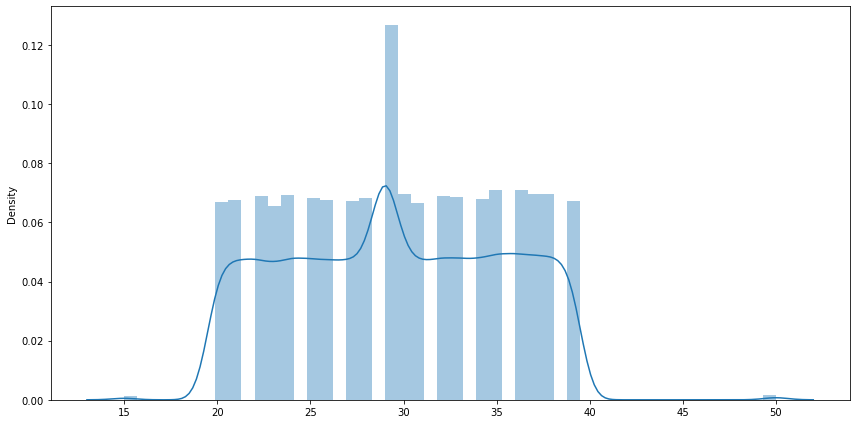

In [33]:
plt.figure(figsize=(12,6))
sns.distplot(x=train_df["Delivery_person_Age"])
plt.tight_layout()

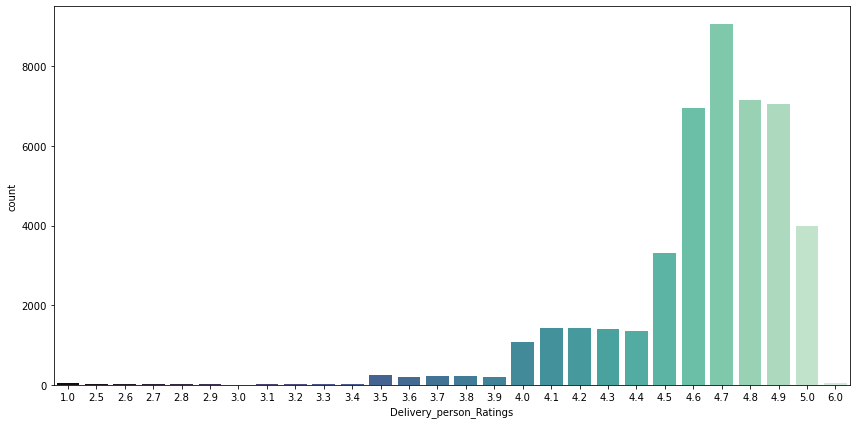

In [34]:
plt.figure(figsize=(12,6))
sns.countplot(x=train_df["Delivery_person_Ratings"],palette="mako")
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

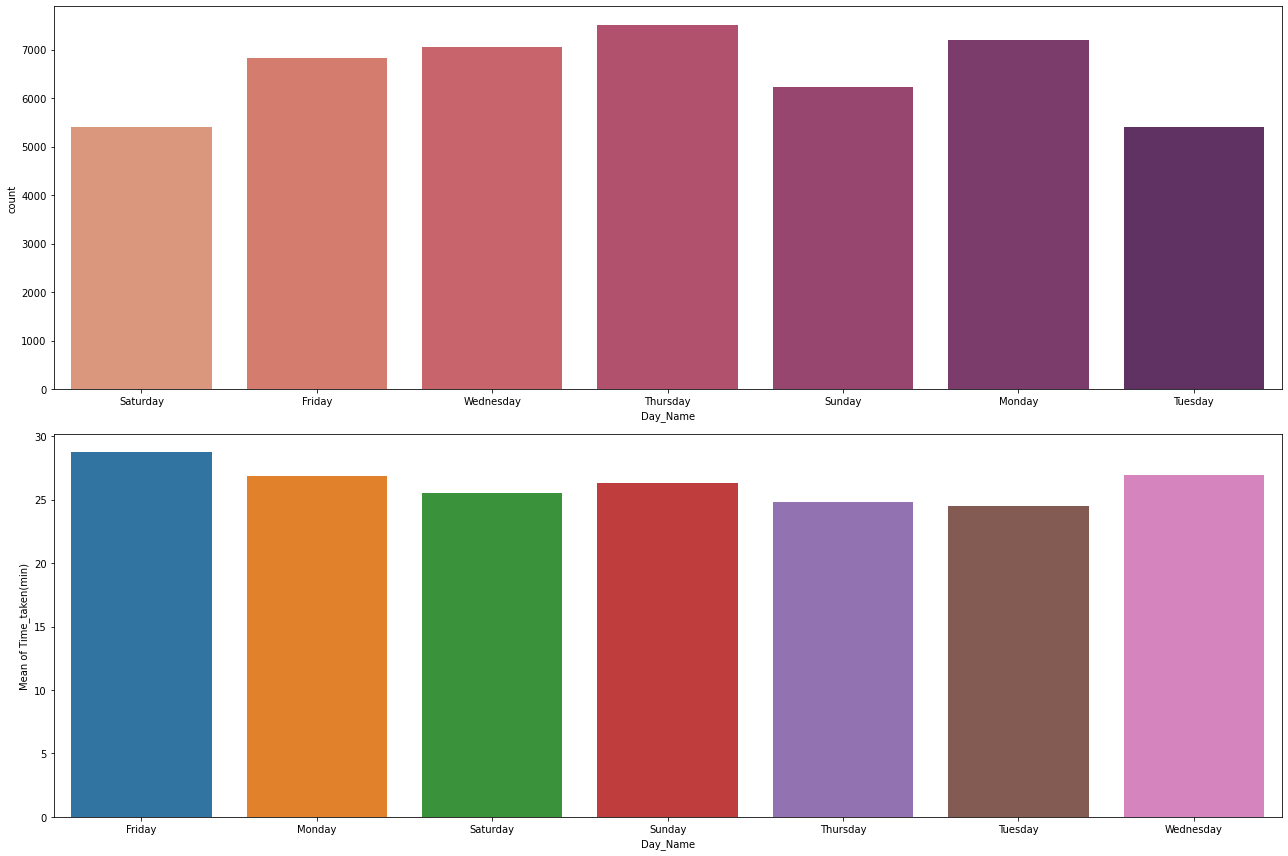

In [35]:
Day_name_df = train_df.groupby("Day_Name")["Time_taken(min)"].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1=sns.barplot(x=Day_name_df["Day_Name"],y=Day_name_df["Time_taken(min)"],ax=ax[1])
ax1.set_ylabel("Mean of Time_taken(min)")
ax2 = sns.countplot(x=train_df["Day_Name"],palette="flare",ax=ax[0])
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

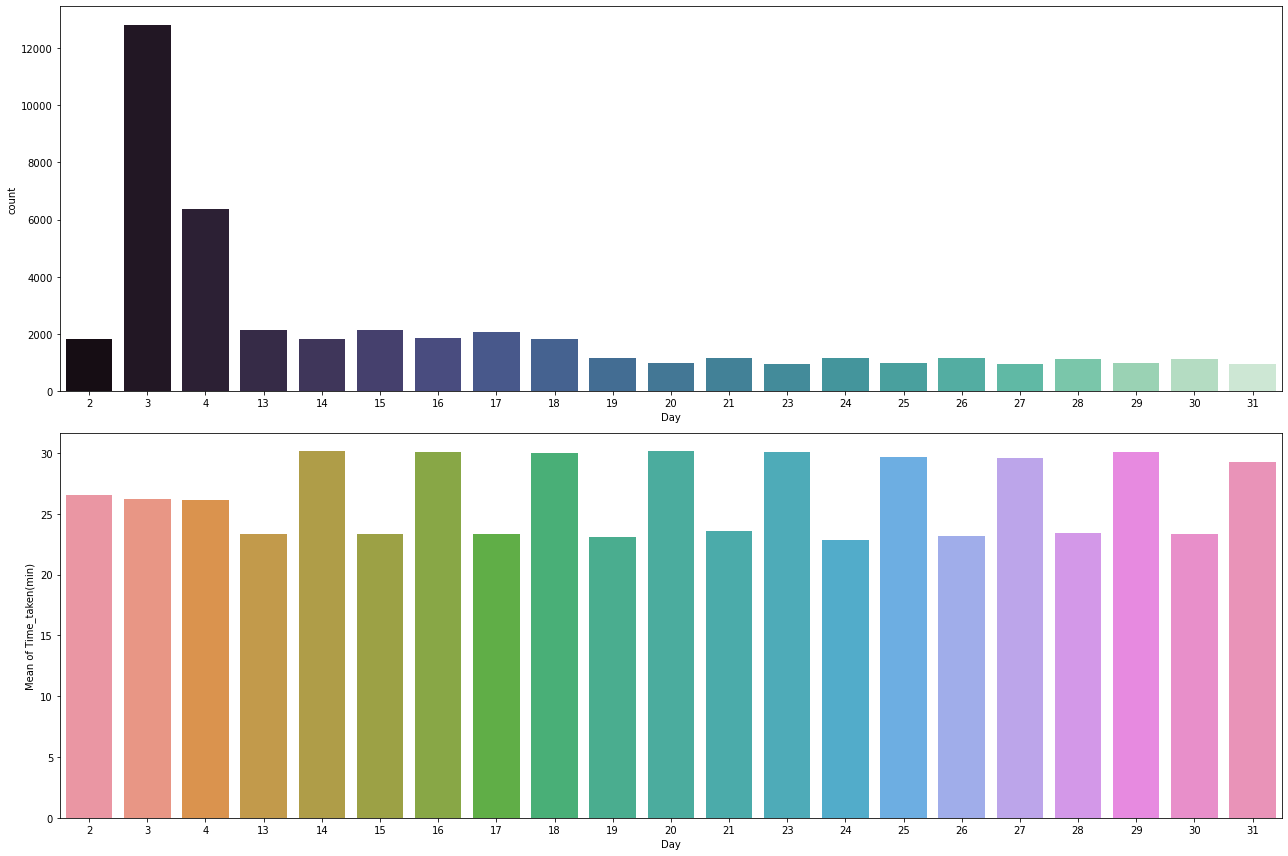

In [36]:
Day_df = train_df.groupby("Day")["Time_taken(min)"].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1=sns.barplot(x=Day_df["Day"],y=Day_df["Time_taken(min)"],ax=ax[1])
ax1.set_ylabel("Mean of Time_taken(min)")
ax2 = sns.countplot(x=train_df["Day"],palette="mako",ax=ax[0])
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

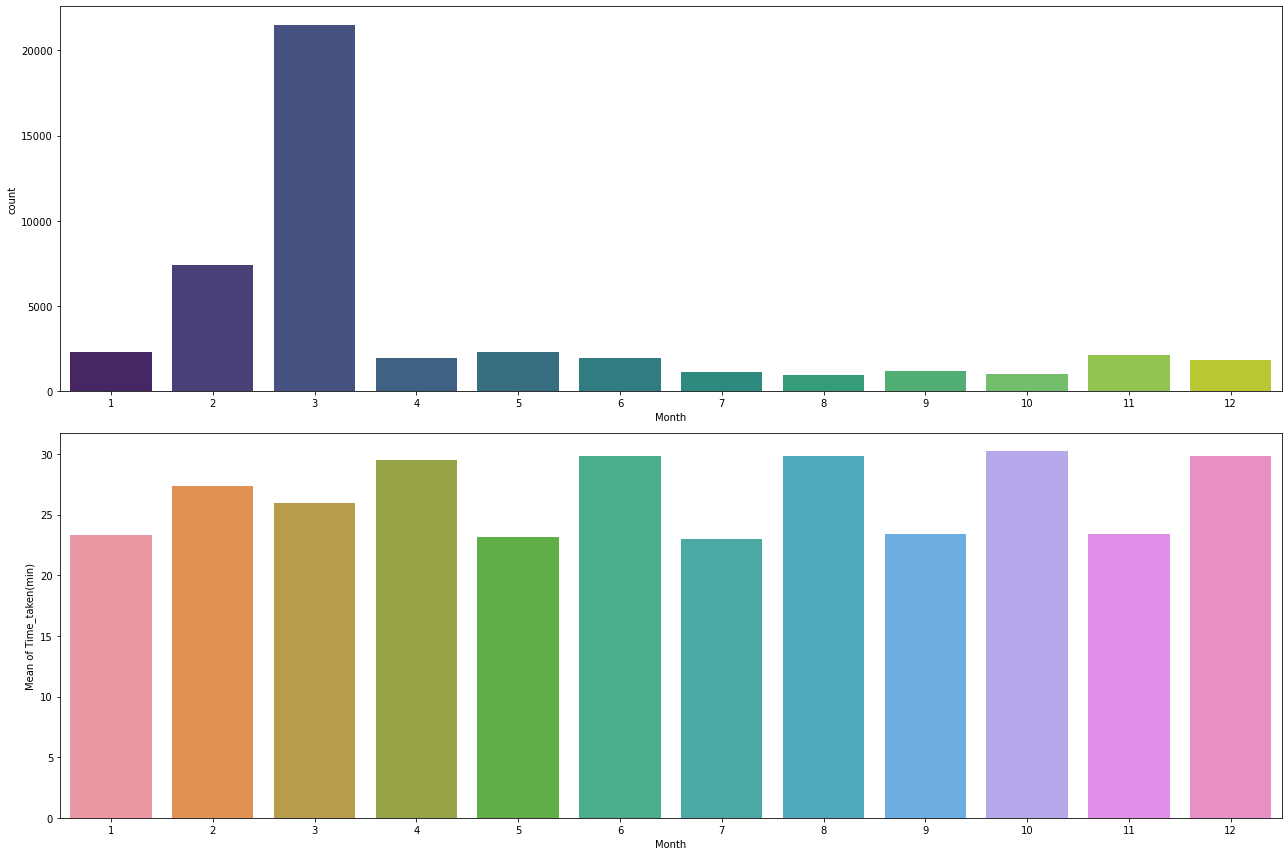

In [37]:
Monthdf = train_df.groupby("Month")["Time_taken(min)"].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1=sns.barplot(x=Monthdf["Month"],y=Monthdf["Time_taken(min)"],ax=ax[1])
ax1.set_ylabel("Mean of Time_taken(min)")
ax2 = sns.countplot(x=train_df["Month"],palette="viridis",ax=ax[0])
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

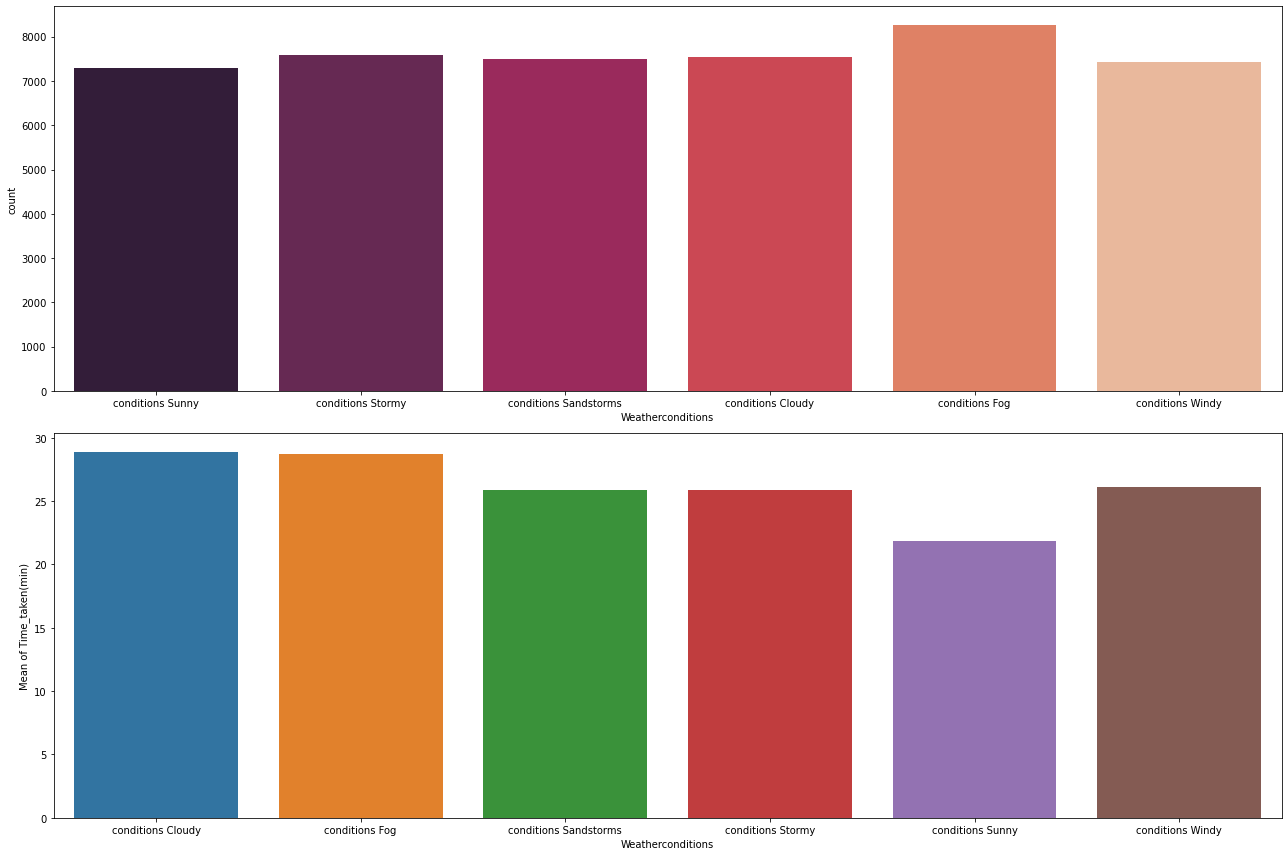

In [38]:
Weatherconditionsdf = train_df.groupby("Weatherconditions")["Time_taken(min)"].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1=sns.barplot(x=Weatherconditionsdf["Weatherconditions"],y=Weatherconditionsdf["Time_taken(min)"],ax=ax[1])
ax1.set_ylabel("Mean of Time_taken(min)")
ax2 = sns.countplot(x=train_df["Weatherconditions"],palette="rocket",ax=ax[0])
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

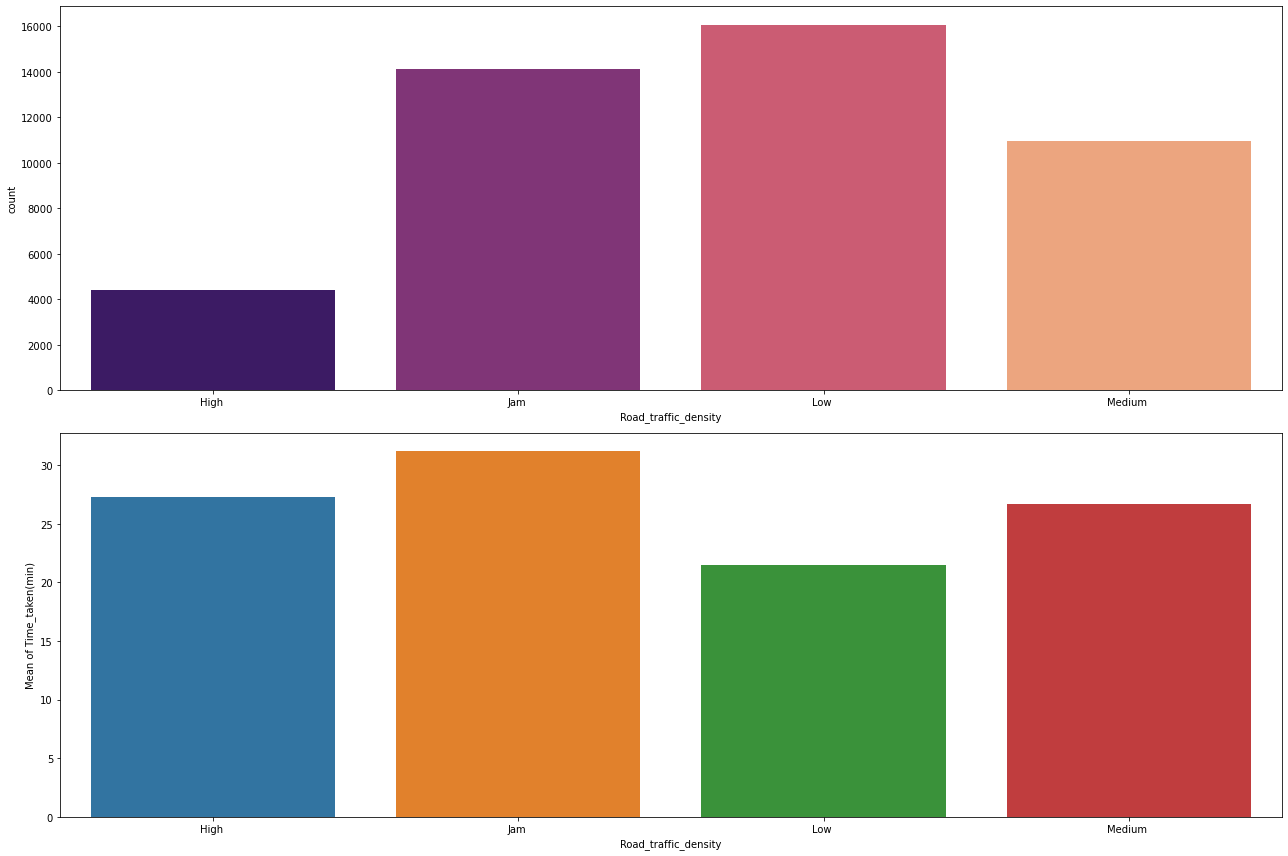

In [39]:
Road_traffic_densitydf = train_df.groupby("Road_traffic_density")["Time_taken(min)"].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1=sns.barplot(x=Road_traffic_densitydf["Road_traffic_density"],y=Road_traffic_densitydf["Time_taken(min)"],ax=ax[1])
ax1.set_ylabel("Mean of Time_taken(min)")
ax2 = sns.countplot(x=train_df["Road_traffic_density"],palette="magma",ax=ax[0])
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

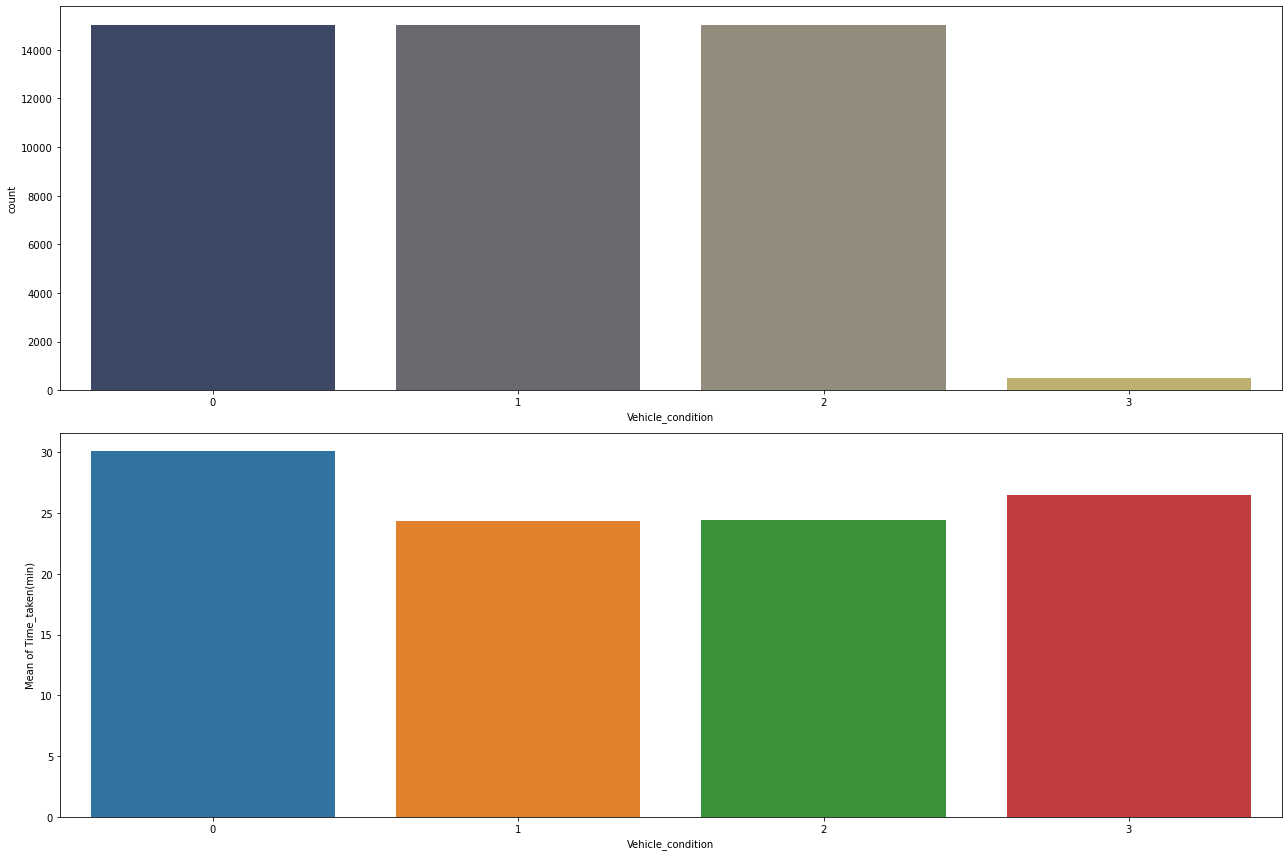

In [40]:
Vehicle_conditiondf = train_df.groupby("Vehicle_condition")["Time_taken(min)"].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1=sns.barplot(x=Vehicle_conditiondf["Vehicle_condition"],y=Vehicle_conditiondf["Time_taken(min)"],ax=ax[1])
ax1.set_ylabel("Mean of Time_taken(min)")
ax2 = sns.countplot(x=train_df["Vehicle_condition"],palette="cividis",ax=ax[0])
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

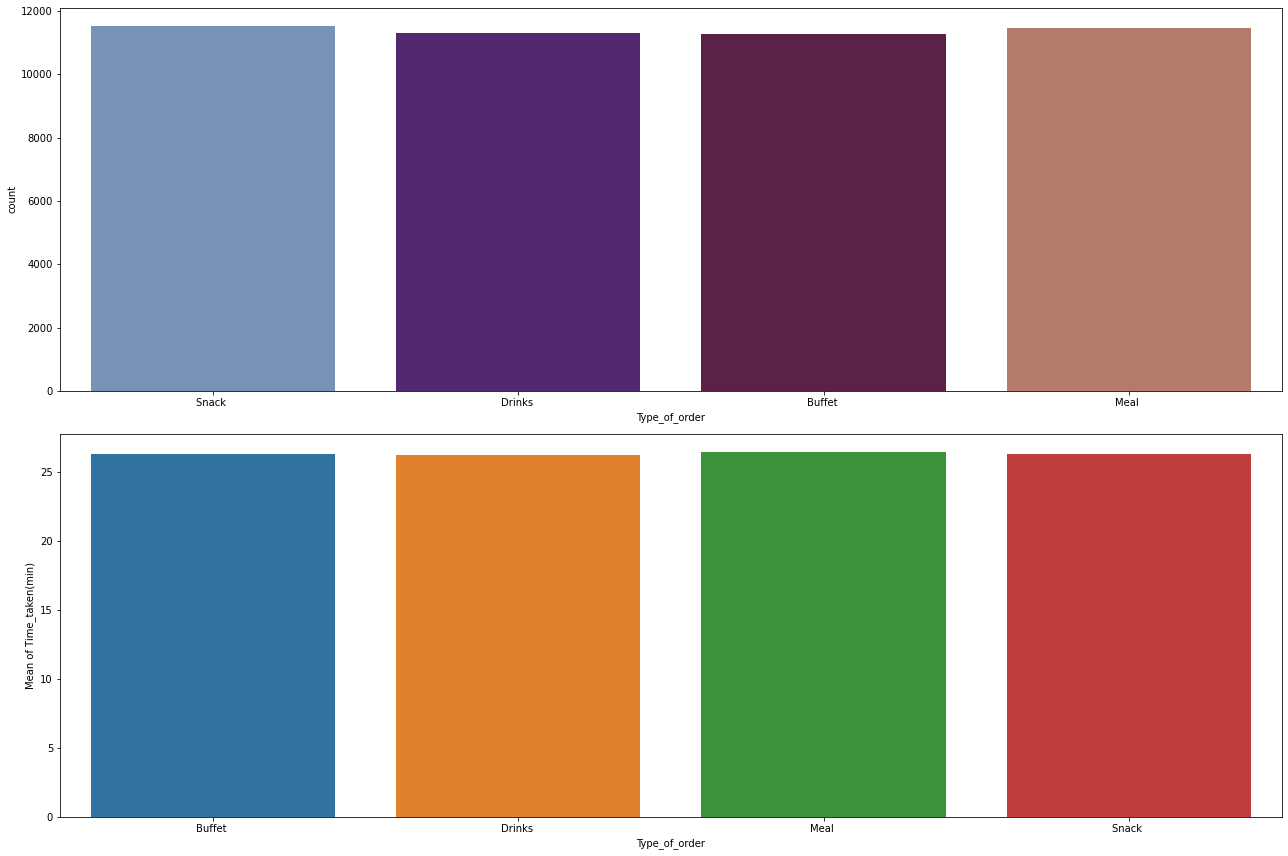

In [41]:
Type_of_orderdf = train_df.groupby("Type_of_order")["Time_taken(min)"].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1=sns.barplot(x=Type_of_orderdf["Type_of_order"],y=Type_of_orderdf["Time_taken(min)"],ax=ax[1])
ax1.set_ylabel("Mean of Time_taken(min)")
ax2 = sns.countplot(x=train_df["Type_of_order"],palette="twilight",ax=ax[0])
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

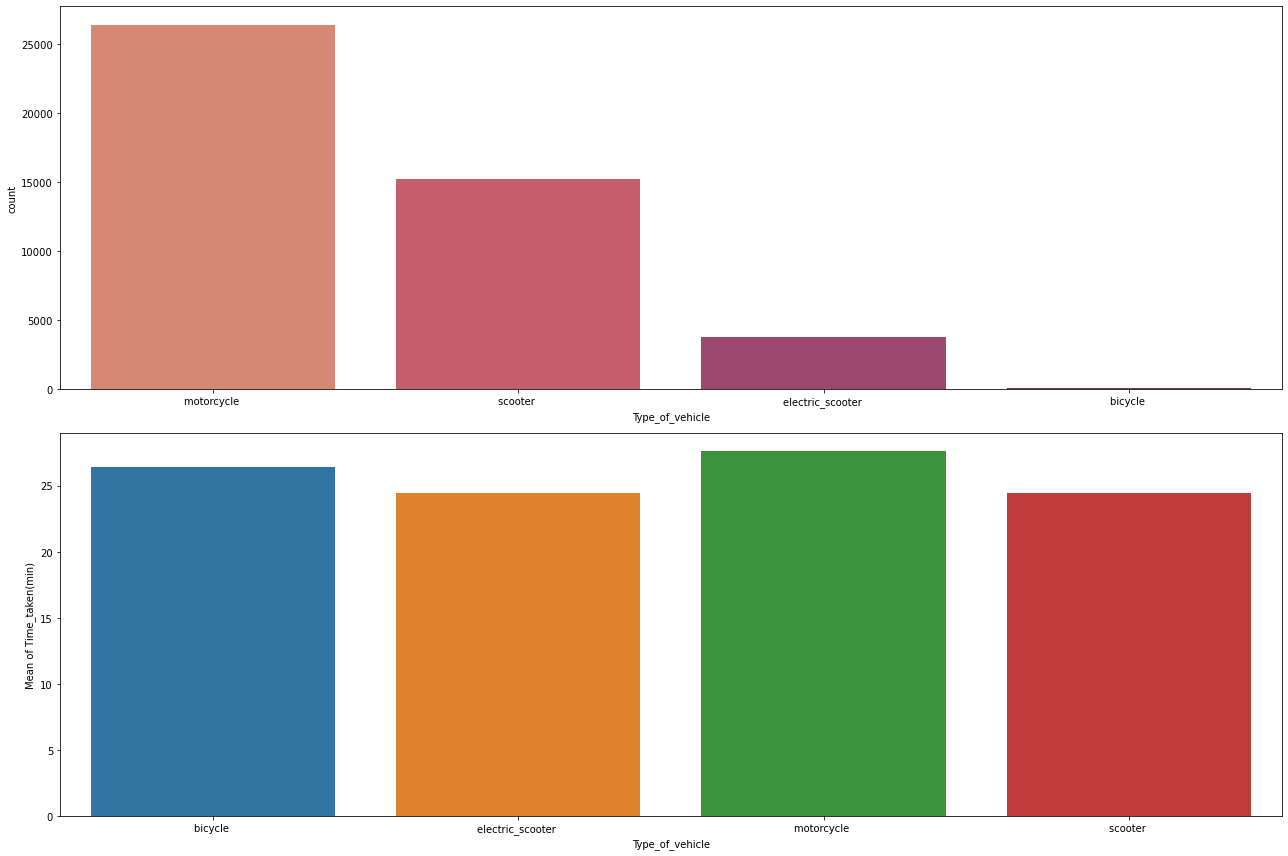

In [42]:
Type_of_vehicledf = train_df.groupby("Type_of_vehicle")["Time_taken(min)"].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1=sns.barplot(x=Type_of_vehicledf["Type_of_vehicle"],y=Type_of_vehicledf["Time_taken(min)"],ax=ax[1])
ax1.set_ylabel("Mean of Time_taken(min)")
ax2 = sns.countplot(x=train_df["Type_of_vehicle"],palette="flare",ax=ax[0])
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

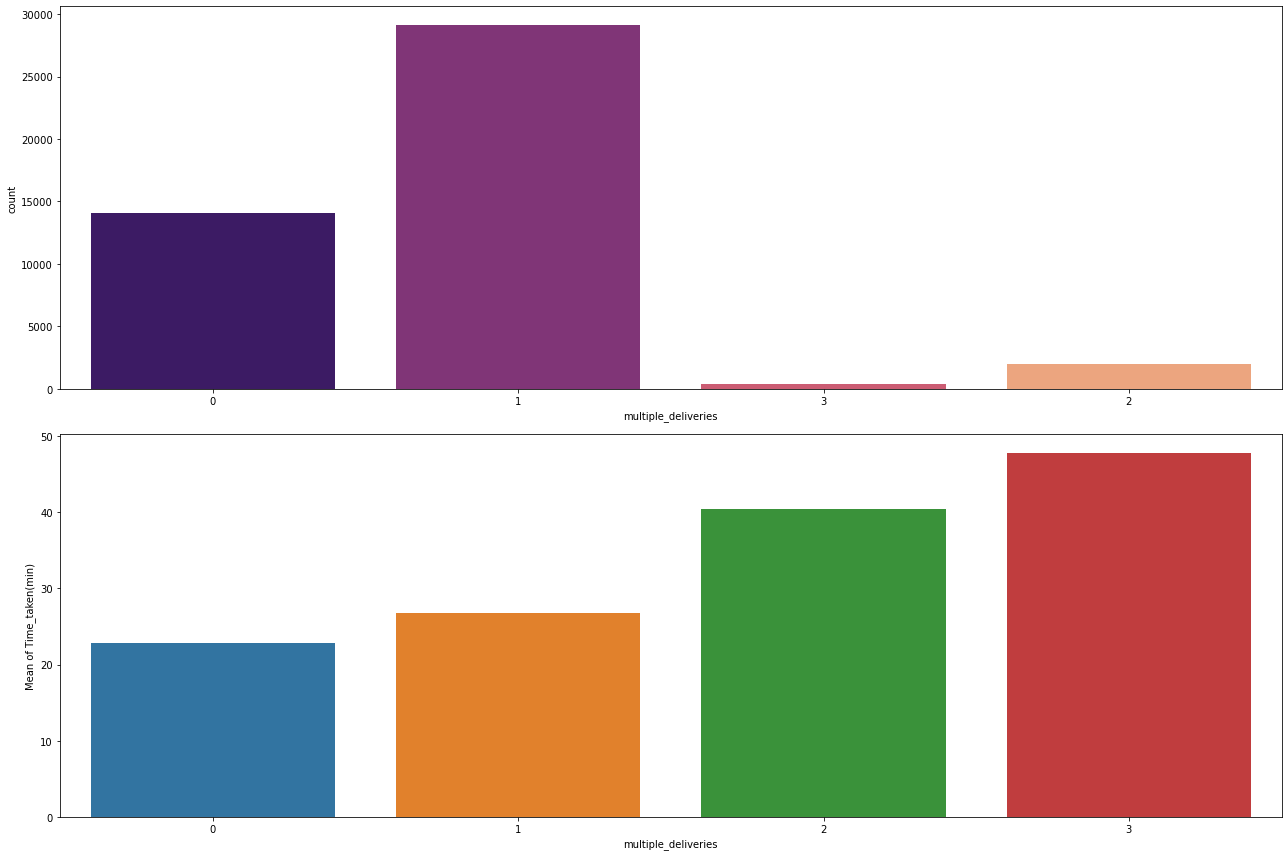

In [43]:
multiple_deliveriesdf = train_df.groupby("multiple_deliveries")["Time_taken(min)"].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1=sns.barplot(x=multiple_deliveriesdf["multiple_deliveries"],y=multiple_deliveriesdf["Time_taken(min)"],ax=ax[1])
ax1.set_ylabel("Mean of Time_taken(min)")
ax2 = sns.countplot(x=train_df["multiple_deliveries"],palette="magma",ax=ax[0])
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

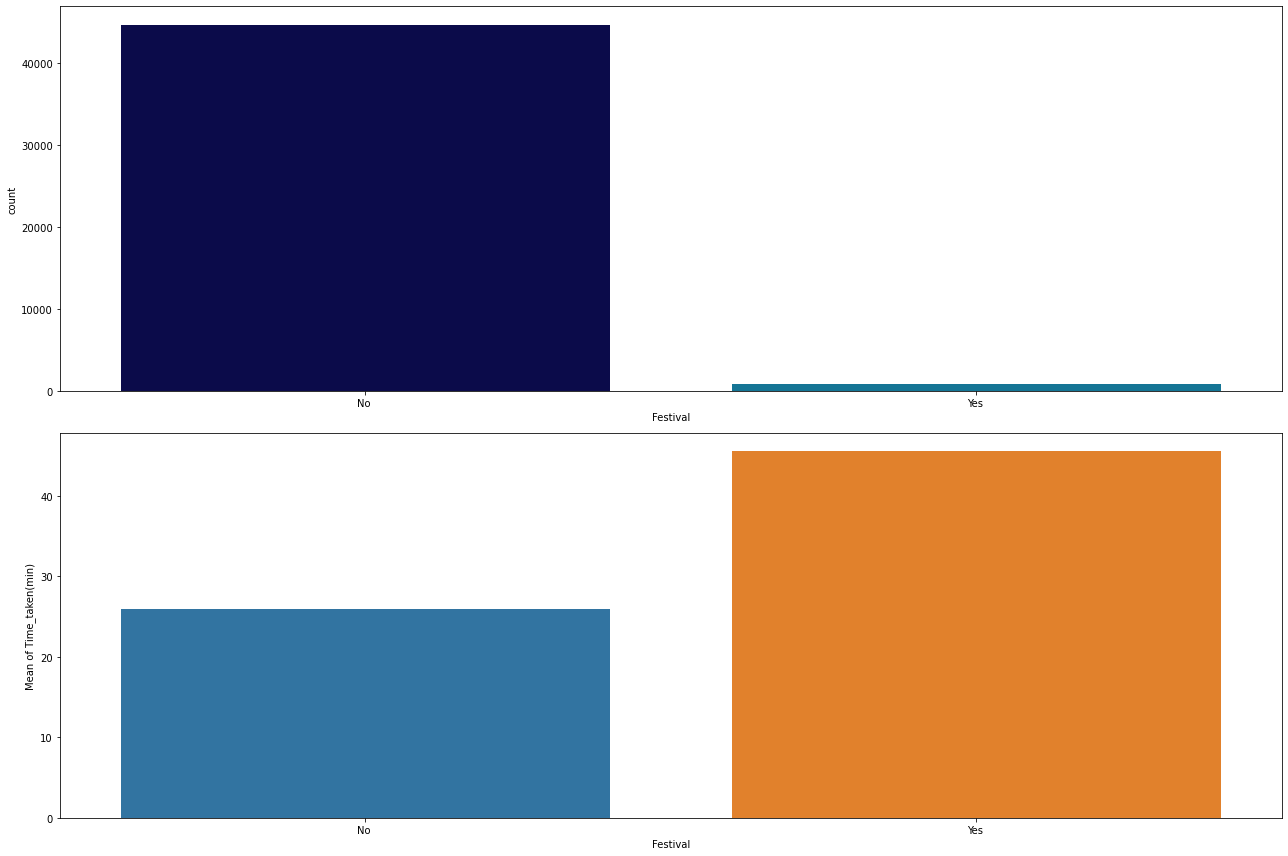

In [44]:
Festivaldf = train_df.groupby("Festival")["Time_taken(min)"].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1=sns.barplot(x=Festivaldf["Festival"],y=Festivaldf["Time_taken(min)"],ax=ax[1])
ax1.set_ylabel("Mean of Time_taken(min)")
ax2 = sns.countplot(x=train_df["Festival"],palette="ocean",ax=ax[0])
plt.tight_layout()

<Figure size 864x432 with 0 Axes>

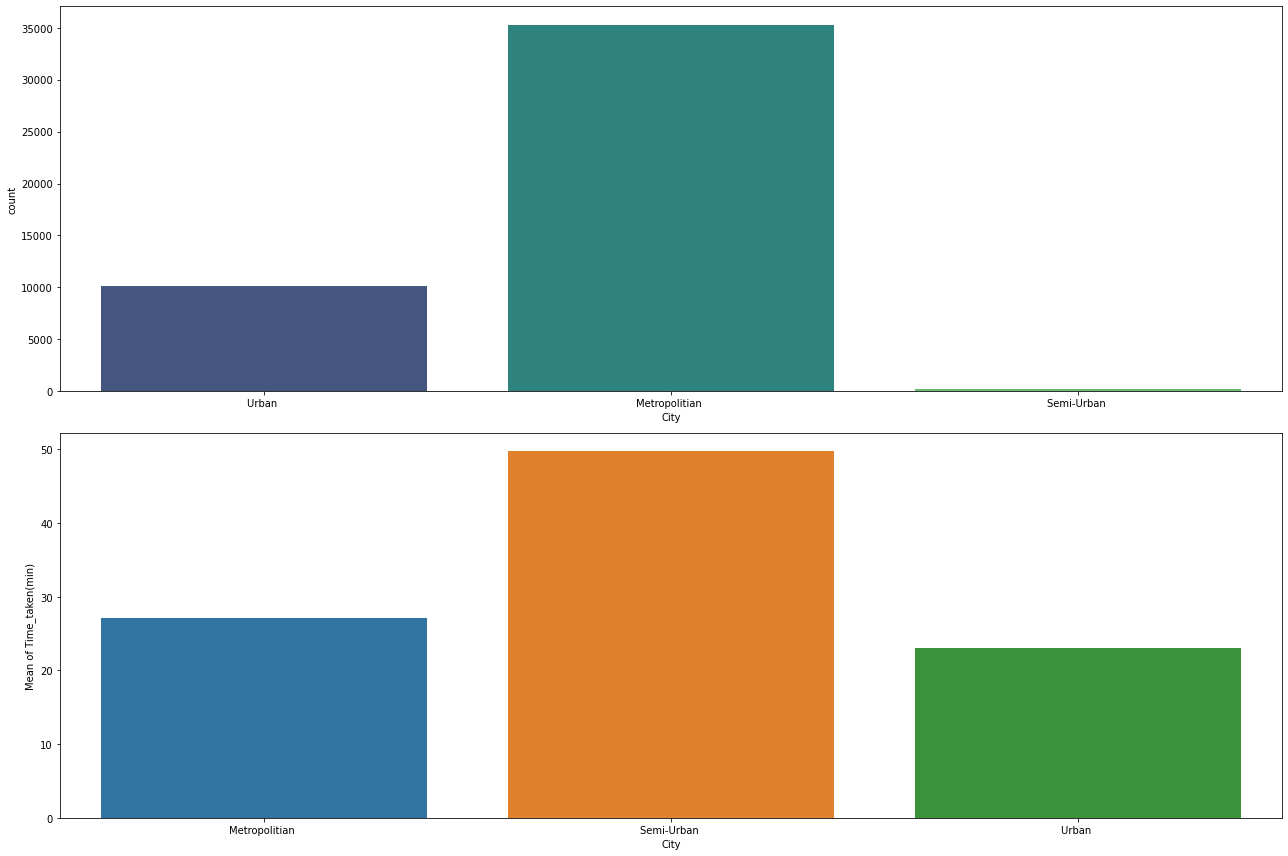

In [45]:
Citydf = train_df.groupby("City")["Time_taken(min)"].mean().to_frame().reset_index()
plt.figure(figsize=(12,6))
fig , ax = plt.subplots(2,1,figsize = (18,12))
ax1=sns.barplot(x=Citydf["City"],y=Citydf["Time_taken(min)"],ax=ax[1])
ax1.set_ylabel("Mean of Time_taken(min)")
ax2 = sns.countplot(x=train_df["City"],palette="viridis",ax=ax[0])
plt.tight_layout()

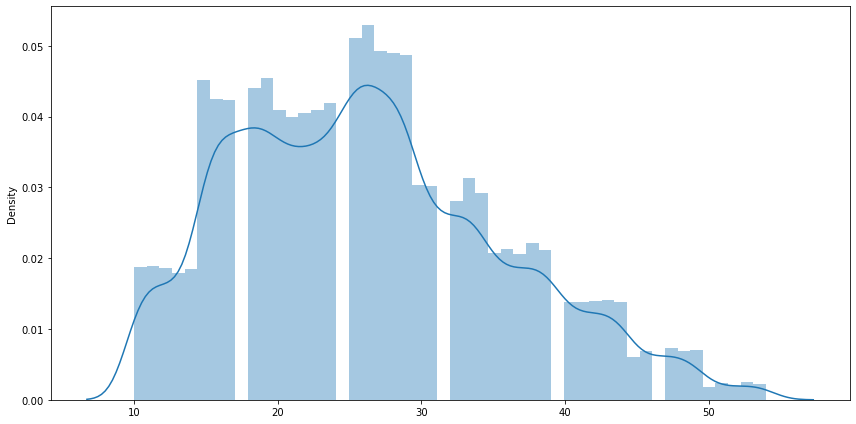

In [46]:
plt.figure(figsize=(12,6))
sns.distplot(x=train_df["Time_taken(min)"])
plt.tight_layout()

In [47]:
train_df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),Day,Month,Day_Name
0,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,0 days 11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,19,3,Saturday
1,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,0 days 19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,25,3,Friday
2,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,0 days 08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,19,3,Saturday
3,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-05-04,18:00:00,0 days 18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,4,5,Wednesday
4,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,0 days 13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,26,3,Saturday


In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   Delivery_person_Age          45593 non-null  float32        
 1   Delivery_person_Ratings      45593 non-null  float32        
 2   Restaurant_latitude          45593 non-null  float64        
 3   Restaurant_longitude         45593 non-null  float64        
 4   Delivery_location_latitude   45593 non-null  float64        
 5   Delivery_location_longitude  45593 non-null  float64        
 6   Order_Date                   45593 non-null  datetime64[ns] 
 7   Time_Orderd                  45593 non-null  object         
 8   Time_Order_picked            45593 non-null  timedelta64[ns]
 9   Weatherconditions            45593 non-null  object         
 10  Road_traffic_density         45593 non-null  object         
 11  Vehicle_condition           

In [49]:
train_df.drop(["Order_Date","Day_Name"],axis=1,inplace=True)
test_df.drop(["Order_Date","Day_Name"],axis=1,inplace=True)

In [50]:
train_df["Road_traffic_density"].unique()

array(['High ', 'Jam ', 'Low ', 'Medium '], dtype=object)

In [51]:
train_df["Road_traffic_density"] = train_df["Road_traffic_density"].replace("Low ",0).replace("Medium ",1).replace("High ",2).replace("Jam ",3)
test_df["Road_traffic_density"] = test_df["Road_traffic_density"].replace("Low ",0).replace("Medium ",1).replace("High ",2).replace("Jam ",3)

In [52]:
train_df["Festival"].unique()

array(['No ', 'Yes '], dtype=object)

In [53]:
train_df["Festival"] = train_df["Festival"].replace("Yes ",1).replace("No ",0)
test_df["Festival"] = test_df["Festival"].replace("Yes ",1).replace("No ",0)

In [54]:
train_df.corr()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Road_traffic_density,Vehicle_condition,Festival,Time_taken(min),Day,Month
Delivery_person_Age,1.000000,-0.068628,-0.001955,-0.006796,0.002359,-0.000593,0.000103,0.001049,0.056933,0.292708,0.003315,-0.002960
Delivery_person_Ratings,-0.068628,1.000000,-0.011870,-0.016724,-0.009912,-0.013116,-0.060811,0.037386,-0.057901,-0.330729,-0.003693,-0.009003
Restaurant_latitude,-0.001955,-0.011870,1.000000,0.661784,0.866378,0.602713,0.026594,-0.033551,0.002983,0.013981,-0.000945,-0.002611
Restaurant_longitude,-0.006796,-0.016724,0.661784,1.000000,0.632293,0.915026,0.025980,-0.038744,-0.005261,0.007821,0.004096,-0.003343
Delivery_location_latitude,0.002359,-0.009912,0.866378,0.632293,1.000000,0.690515,0.012414,-0.001604,0.004037,0.014243,-0.002649,0.001501
Delivery_location_longitude,-0.000593,-0.013116,0.602713,0.915026,0.690515,1.000000,0.007420,-0.001960,-0.001035,0.007625,0.002493,-0.001691
Road_traffic_density,0.000103,-0.060811,0.026594,0.025980,0.012414,0.007420,1.000000,-0.020245,0.118406,0.411936,0.010056,0.012187
Vehicle_condition,0.001049,0.037386,-0.033551,-0.038744,-0.001604,-0.001960,-0.020245,1.000000,-0.079085,-0.234398,0.002479,-0.004493
Festival,0.056933,-0.057901,0.002983,-0.005261,0.004037,-0.001035,0.118406,-0.079085,1.000000,0.290046,0.009234,0.010593
Time_taken(min),0.292708,-0.330729,0.013981,0.007821,0.014243,0.007625,0.411936,-0.234398,0.290046,1.000000,0.012468,0.028250


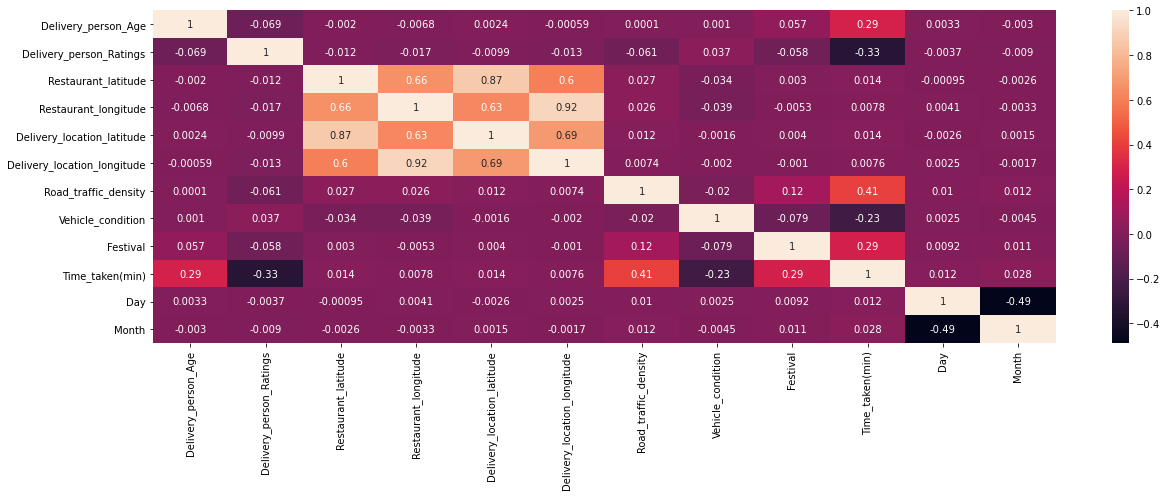

In [55]:
plt.figure(figsize=(18,7))
sns.heatmap(train_df.corr(),annot=True)
plt.tight_layout()

In [56]:
dummies = pd.get_dummies(train_df[["Weatherconditions","Type_of_order","Type_of_vehicle","City"]])
train_df = pd.concat([train_df,dummies],axis=1)
train_df.drop(["Weatherconditions","Type_of_order","Type_of_vehicle","City"],axis=1,inplace=True)
#####
dummies2 = pd.get_dummies(test_df[["Weatherconditions","Type_of_order","Type_of_vehicle","City"]])
test_df = pd.concat([test_df,dummies2],axis=1)
test_df.drop(["Weatherconditions","Type_of_order","Type_of_vehicle","City"],axis=1,inplace=True)

In [57]:
train_df["multiple_deliveries"]= train_df["multiple_deliveries"].astype("int32")
test_df["multiple_deliveries"]= test_df["multiple_deliveries"].astype("int32")

In [58]:
train_df["Time_Order_picked"] = train_df["Time_Order_picked"].apply(lambda x: x.total_seconds())
test_df["Time_Order_picked"] = test_df["Time_Order_picked"].apply(lambda x: x.total_seconds())

In [59]:
train_df["Time_Orderd"] = pd.to_timedelta(train_df["Time_Orderd"])
train_df["Time_Orderd"] = train_df["Time_Orderd"].apply(lambda x: x.total_seconds())
test_df["Time_Orderd"] = pd.to_timedelta(test_df["Time_Orderd"])
test_df["Time_Orderd"] = test_df["Time_Orderd"].apply(lambda x: x.total_seconds())

In [60]:
X = train_df.drop("Time_taken(min)",axis=1)
Y = train_df["Time_taken(min)"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [62]:
def RSE(y_true, y_predicted):
    y_true = np.array(y_true)
    y_predicted = np.array(y_predicted)
    RSS = np.sum(np.square(y_true - y_predicted))

    rse = sqrt(RSS / (len(y_true) - 2))
    return rse

In [63]:
models=[LinearRegression(),RandomForestRegressor(n_estimators=42,n_jobs=-1),AdaBoostRegressor(),KNeighborsRegressor(),DecisionTreeRegressor(),GradientBoostingRegressor(),XGBRegressor(),LGBMRegressor()]
model_names=["LinearRegression","RandomForestRegressor","AdaBoostRegressor","KNeighborsRegressor","DecisionTreeRegressor","GradientBoostingRegressor","XGBRegressor","LGBMRegressor"]
MSE=[]
r_2=[]
RSE_ = []
accuracy = []
RMSE = []
d={}
for model in range (len(models)):
    model=models[model]
    model.fit(X_train,y_train)
    y_pre=model.predict(X_test)
    MSE.append(round(mean_squared_error(y_true=y_test,y_pred=y_pre),5))
    r_2.append(r2_score(y_true=y_test,y_pred=y_pre))
    RSE_.append(round(RSE(y_test,y_pre),5))
    accuracy.append((model.score(X_test,y_test))*100)
    RMSE.append(sqrt(mean_squared_error(y_true=y_test,y_pred=y_pre)))
d=pd.DataFrame({'Modelling Name':model_names,'MSE':MSE,"R_2":r_2,"RSE":RSE_,"Accuracy":accuracy,"RMSE":RMSE})


In [64]:
d

,Modelling Name,MSE,R_2,RSE,Accuracy,RMSE
0,LinearRegression,40.54348,0.548319,6.36784,54.831950,6.367376
1,RandomForestRegressor,23.24220,0.741067,4.82137,74.106691,4.821016
2,AdaBoostRegressor,43.05581,0.520331,6.56217,52.033052,6.561692
3,KNeighborsRegressor,74.85074,0.166114,8.65226,16.611440,8.651632
4,DecisionTreeRegressor,43.80304,0.512006,6.61887,51.200583,6.618387
5,GradientBoostingRegressor,26.84653,0.700912,5.18174,70.091228,5.181364
6,XGBRegressor,19.03847,0.787899,4.36363,78.789910,4.363310
7,LGBMRegressor,19.39913,0.783881,4.40477,78.388114,4.404445


In [65]:
model = XGBRegressor()
model.fit(X,Y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [66]:
test_df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Road_traffic_density,Vehicle_condition,multiple_deliveries,Festival,Day,Month,Weatherconditions_conditions Cloudy,Weatherconditions_conditions Fog,Weatherconditions_conditions Sandstorms,Weatherconditions_conditions Stormy,Weatherconditions_conditions Sunny,Weatherconditions_conditions Windy,Type_of_order_Buffet,Type_of_order_Drinks,Type_of_order_Meal,Type_of_order_Snack,Type_of_vehicle_bicycle,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter,City_Metropolitian,City_Semi-Urban,City_Urban
0,0x2318,COIMBRES13DEL01,29.0,4.7,11.003669,76.976494,11.043669,77.016494,NaN,54300.0,0,3,1,0,30,3,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0x3474,BANGRES15DEL01,28.0,4.6,12.975377,77.696664,13.085377,77.806664,73800.0,74100.0,3,0,1,0,29,3,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
2,0x9420,JAPRES09DEL03,23.0,4.5,26.911378,75.789034,27.001378,75.879034,70500.0,71100.0,3,0,1,0,3,10,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
3,0x72ee,JAPRES07DEL03,21.0,4.8,26.766536,75.837333,26.856536,75.927333,62100.0,62400.0,1,1,1,0,4,2,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
4,0xa759,CHENRES19DEL01,31.0,4.6,12.986047,80.218114,13.096047,80.328114,66300.0,67200.0,1,2,1,0,27,3,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0


In [67]:
ids = test_df["ID"]
test_df.drop(["ID","Delivery_person_ID"],axis=1,inplace=True)

In [68]:
test_df.isna().sum()

Delivery_person_Age                          0
Delivery_person_Ratings                      0
Restaurant_latitude                          0
Restaurant_longitude                         0
Delivery_location_latitude                   0
Delivery_location_longitude                  0
Time_Orderd                                444
Time_Order_picked                            0
Road_traffic_density                         0
Vehicle_condition                            0
multiple_deliveries                          0
Festival                                     0
Day                                          0
Month                                        0
Weatherconditions_conditions Cloudy          0
Weatherconditions_conditions Fog             0
Weatherconditions_conditions Sandstorms      0
Weatherconditions_conditions Stormy          0
Weatherconditions_conditions Sunny           0
Weatherconditions_conditions Windy           0
Type_of_order_Buffet                         0
Type_of_order

In [69]:
test_df["Time_Orderd"].fillna(test_df["Time_Orderd"].mean(),inplace=True)

In [70]:
Predictions = model.predict(test_df)
Predictions

array([21.214777, 29.774952, 31.360134, ..., 32.263763, 26.022408,
       21.003128], dtype=float32)

In [71]:
Prediction = pd.DataFrame({"ID":ids,"Time_taken (min)":Predictions})

In [72]:
Prediction

,ID,Time_taken (min)
0,0x2318,21.214777
1,0x3474,29.774952
2,0x9420,31.360134
3,0x72ee,26.823927
4,0xa759,22.898458
...,...,...
11394,0x6909,21.092047
11395,0x443b,29.555773
11396,0x1ea5,32.263763
11397,0x22d4,26.022408


In [73]:
Prediction.to_csv("data/submissions.csv",index=False)